<a href="https://colab.research.google.com/github/e46537303-ui/Finanzas-Proyecto1/blob/main/An%C3%A1lisis_de_Riesgo_Crediticio_en_el_Sector_Financiero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQQv19sYf-SfZOG2VTlerwbIXDgZ3kLV5Ur6OtSCekbtAHXWR3qiWcb9w_5FO-fg8IJsQlQiJ0IVL6d/pub?output=csv')
print(df)

      mora  atraso  vivienda  edad  dias_lab  exp_sf  nivel_ahorro   ingreso  \
0        0     235  FAMILIAR    30      3748    93.0             5   3500.00   
1        0      18  FAMILIAR    32      4598     9.0            12    900.00   
2        0       0  FAMILIAR    26      5148     8.0             2   2400.00   
3        0       0  FAMILIAR    36      5179    20.0            12   2700.00   
4        0       0  FAMILIAR    46      3960     NaN             1   3100.00   
...    ...     ...       ...   ...       ...     ...           ...       ...   
8394     0       0    PROPIA    43      7917   106.0            12  13660.00   
8395     1       0  FAMILIAR    29      3352    25.0             0    813.00   
8396     0       0  FAMILIAR    32      6821    19.0            12   3000.00   
8397     1       0    PROPIA    38      3882     7.0            12   3069.23   
8398     0       0  FAMILIAR    36      5909    51.0            12   3500.00   

       linea_sf  deuda_sf  score       

Preguntas clave del negocio (Sector Finanzas)

¿Qué perfil de cliente presenta mayor riesgo de incumplimiento?

¿Cómo se distribuye el score crediticio en la cartera?

¿La relación deuda/ingreso (DTI) influye en la mora?

¿Existen montos o productos más riesgosos que otros?

¿Qué variables son más útiles para construir un modelo predictivo?

Etapa 1 – Obtención y Preparación de Datos (SQL)

In [2]:
nulos = df.isnull().sum()
nulos

,0
mora,0
atraso,0
vivienda,0
edad,0
dias_lab,0
exp_sf,1830
nivel_ahorro,0
ingreso,0
linea_sf,1127
deuda_sf,461


Revisar la distribución de cada variable con nulos

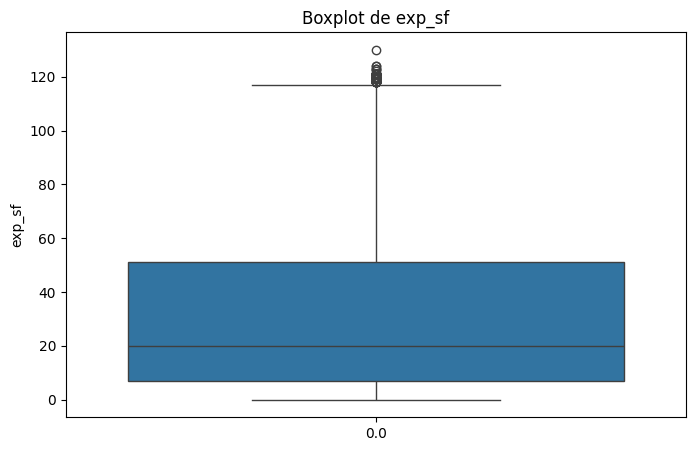

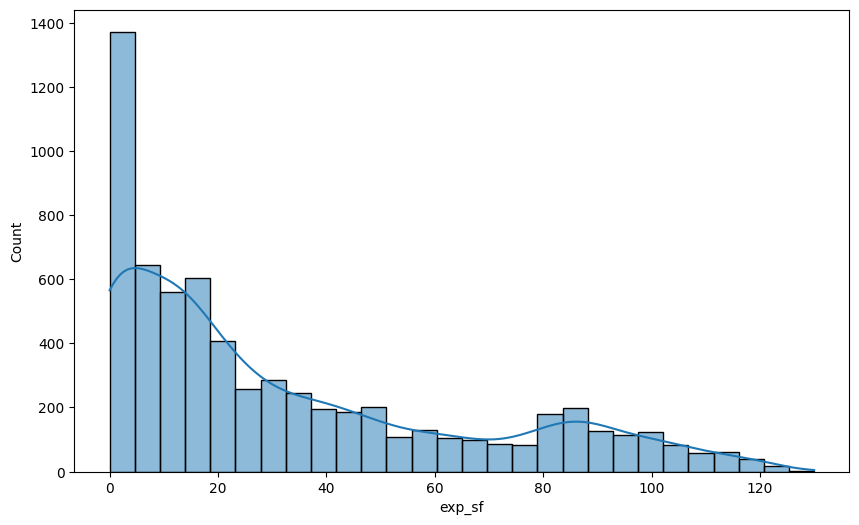

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df['exp_sf'].describe().round(2)

plt.figure(figsize=(8, 5))
sns.boxplot(x=np.zeros(len(df)), y=df['exp_sf'])
plt.ylabel('exp_sf')
plt.xlabel('')
plt.title('Boxplot de exp_sf')
plt.show()


plt.figure(figsize=(10,6))
sns.histplot(df['exp_sf'], kde=True)
plt.show()



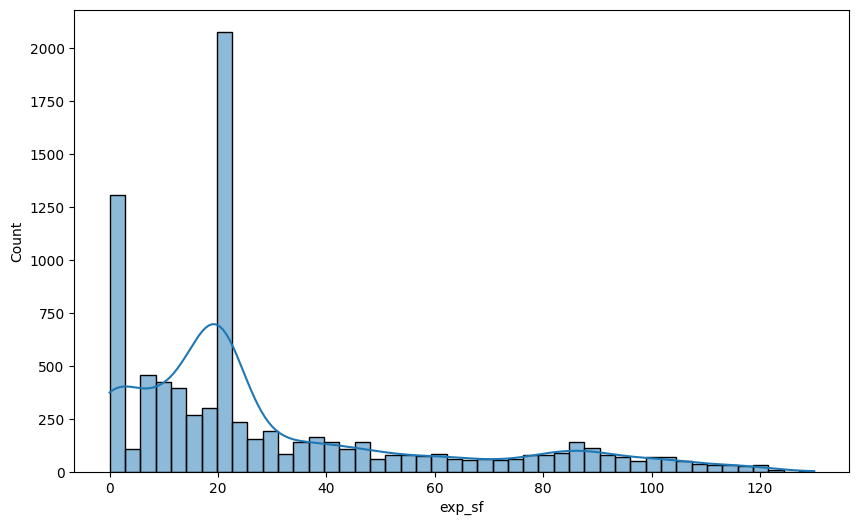

In [4]:
df['exp_sf'] = df['exp_sf'].fillna(df['exp_sf'].median())
df['exp_sf'].describe().round(2)

plt.figure(figsize=(10,6))
sns.histplot(df['exp_sf'], kde=True)
plt.show()

✅ 1. La variable no es normal — es asimétrica (sesgo a la derecha)

El pico entre 15 y 20 indica que la mayor parte de los clientes tiene poca experiencia financiera.

Este comportamiento es típico en datos financieros:
la mayoría de los usuarios tienen experiencia moderada, y solo unos pocos tienen valores altos.

✅ 2. El segundo “bache” sugiere valores repartidos, no un segundo grupo claro

Esa caída / bache en 75–85 indica:

No hay un grupo importante de clientes con alta experiencia.

Los valores altos existen, pero son pocos y están dispersos.

👉 No es una distribución bimodal.

✅ 3. La caída hacia cero muestra pocos valores extremos

A partir de ~100 hacia arriba casi no hay valores.

Esto confirma que:

Los outliers no dominan la variable, aunque existen algunos.

Por eso la mediana era una buena opción para el fillna.

**“La variable exp_sf presenta una distribución sesgada hacia la derecha: la mayoría de los clientes tiene entre 10 y 30 unidades de experiencia financiera. Los valores altos (>80) son escasos y no forman un grupo fuerte, por lo que la mediana (20) es una imputación adecuada para tratar los valores nulos.”**

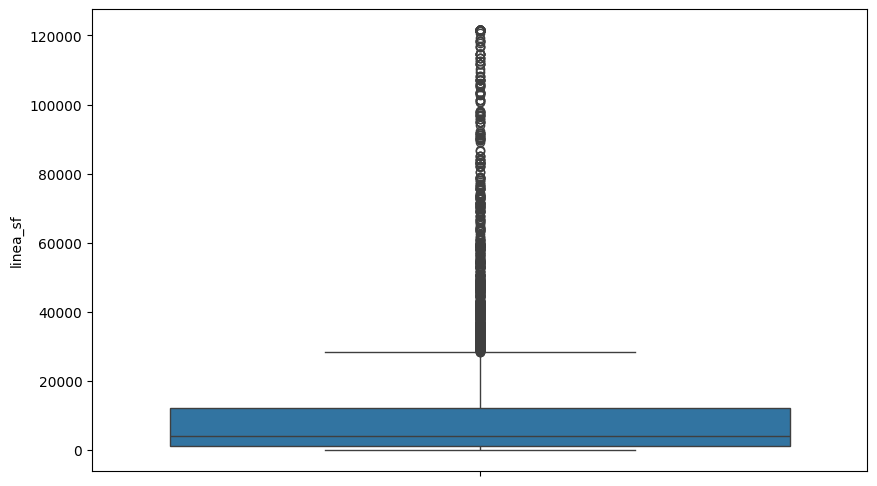

In [5]:
df["linea_sf"].describe().round(2)
plt.figure(figsize=(10,6))
sns.boxplot(y=df["linea_sf"])
plt.show()

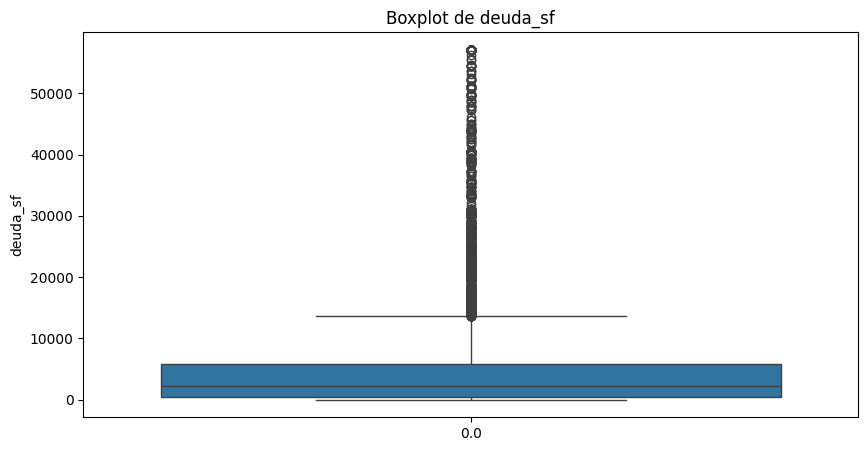

In [6]:
df["deuda_sf"].describe().round(2)

import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,6))
# sns.boxenplot(y=df['deuda_sf'])
# plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=np.zeros(len(df)), y=df['deuda_sf'])
plt.ylabel('deuda_sf')
plt.xlabel('')
plt.title('Boxplot de deuda_sf')
plt.show()


<Axes: xlabel='deuda_sf', ylabel='Count'>

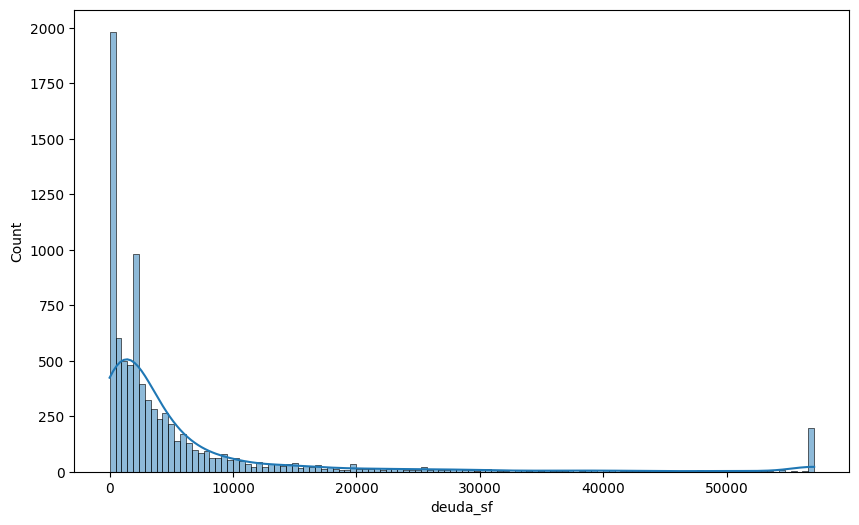

In [7]:
df['deuda_sf'] = df['deuda_sf'].fillna(df['deuda_sf'].median())
df['deuda_sf']

plt.figure(figsize=(10,6))
sns.histplot(df['deuda_sf'], kde=True)

✅ Descripción final y prolija de la distribución de deuda_sf

La variable deuda_sf (deuda total del cliente en el sistema financiero) muestra una distribución altamente asimétrica positiva (sesgo a la derecha).

🔹 Comportamiento de la distribución

El pico más alto del histograma corresponde al valor de la mediana, que fue utilizado para imputar los valores faltantes.

La mayor parte de los clientes presenta niveles de deuda relativamente bajos.

Existe una cola derecha extensa, que alcanza aproximadamente 55.000, indicando un pequeño grupo de clientes con deudas significativamente mayores al promedio.

🔹 Interpretación financiera

La presencia de valores muy altos indica la existencia de clientes "sobreendeudados", lo cual puede ser un indicador de alto riesgo crediticio.

La asimetría positiva es típica en datos financieros, donde pocos clientes concentran grandes montos.

La imputación por mediana fue adecuada, ya que reduce el impacto de los outliers en el reemplazo de los datos faltantes.

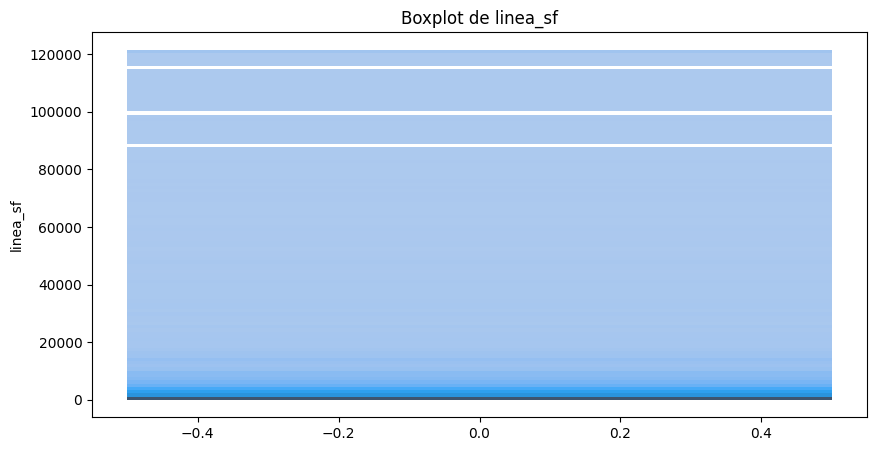

<Axes: xlabel='linea_sf', ylabel='Count'>

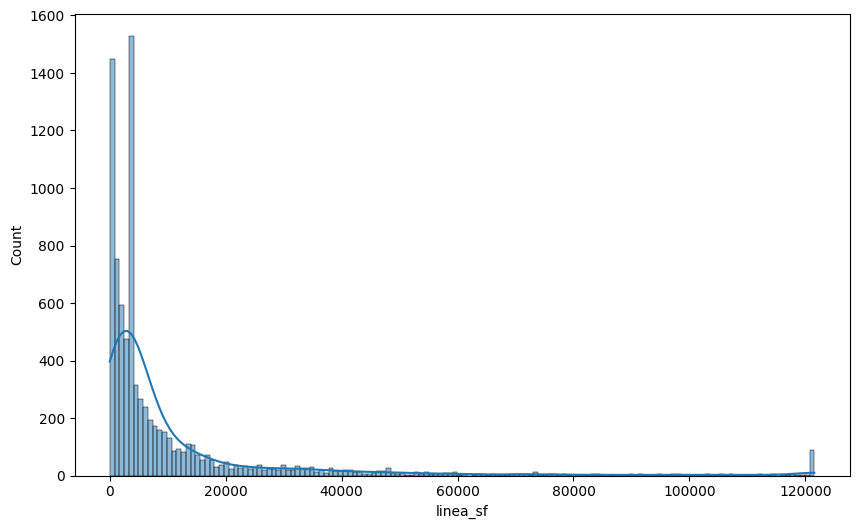

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(x=np.zeros(len(df)), y=df['linea_sf'])
plt.ylabel('linea_sf')
plt.xlabel('')
plt.title('Boxplot de linea_sf')
plt.show()

df['linea_sf'] = df['linea_sf'].fillna(df['linea_sf'].median())
df['linea_sf']

plt.figure(figsize=(10,6))
sns.histplot(df['linea_sf'], kde=True)

1. Alta concentración en valores bajos

La mayor frecuencia se observa entre 0 y aproximadamente 10 000 unidades monetarias, donde se concentran miles de observaciones.

Esto sugiere que la mayoría de los clientes accede a líneas de crédito pequeñas o moderadas.

Los picos alrededor de valores muy bajos indican que podría haber montos estándar o productos con valores predeterminados dentro de este rango.

2. Distribución claramente no normal

La curva KDE (kernel density estimation) confirma que la distribución está muy sesgada.

Esto implica que medidas como la media estarán influidas por valores extremos, por lo que es recomendable reportar también mediana y percentiles.

3. Presencia de valores atípicos (outliers)

En la cola derecha se observan líneas de crédito superiores a 60 000, 80 000, e incluso alrededor de 120 000.

Aunque su frecuencia es baja, estos valores pueden representar:

Clientes premium,

Productos corporativos,

Errores de captura o codificación.

Es recomendable evaluarlos mediante análisis de outliers antes de modelar o segmentar.

4. Implicaciones operativas y analíticas

Para modelos predictivos, puede ser necesario aplicar transformaciones como logaritmos para estabilizar la varianza.

Para segmentación, esta distribución puede justificar dividir clientes en grupos según percentiles (por ejemplo P50, P75, P95).

Si se trata de riesgo crediticio, la concentración en montos bajos puede implicar una cartera más atomizada pero también más voluminosa en número de clientes.

Conclusión

La variable linea_sf presenta una distribución altamente asimétrica, dominada por líneas de crédito bajas y con una presencia moderada pero significativa de valores extremos. Esto sugiere heterogeneidad en los perfiles de clientes y la necesidad de un tratamiento cuidadoso de estos valores para análisis posteriores, especialmente en modelos estadísticos o de riesgo. **texto en negrita**

In [9]:
df.describe().round(2)

,mora,atraso,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,clasif_sbs
count,8399.00,8399.00,8399.00,8399.00,8399.00,8399.00,8399.00,8399.00,8399.00,8399.00,8399.00
mean,0.70,4.46,36.40,5555.89,29.70,10.59,4350.41,10919.53,5899.30,196.62,0.56
std,0.46,14.27,9.83,2153.24,29.51,3.37,5367.06,20025.08,10902.22,19.54,0.91
min,0.00,0.00,20.00,2956.00,0.00,0.00,123.70,0.00,0.00,134.00,0.00
25%,0.00,0.00,29.00,4174.00,10.00,12.00,1366.67,1500.00,535.15,182.00,0.00
50%,1.00,0.00,34.00,4904.00,20.00,12.00,2400.00,4030.12,2258.76,197.00,0.00
75%,1.00,2.00,42.00,6182.00,39.00,12.00,4900.00,9861.00,5386.73,212.00,1.00
max,1.00,245.00,85.00,20700.00,130.00,12.00,30000.00,121543.40,57094.38,266.00,4.00


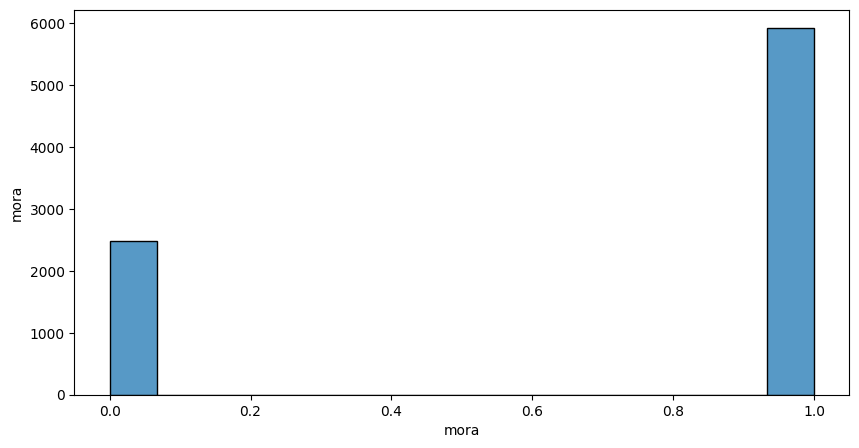

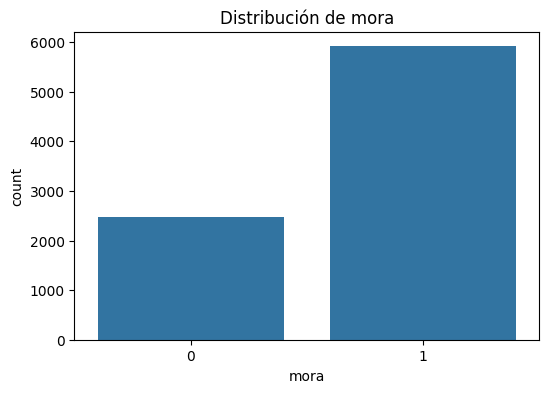

,proportion
mora,
1,0.7
0,0.3


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(x=df['mora'])
plt.ylabel('mora')

plt.figure(figsize=(6,4))
sns.countplot(x=df['mora'])
plt.xlabel('mora')
plt.ylabel('count')
plt.title('Distribución de mora')
plt.show()

df['mora'].value_counts(normalize=True).round(2)

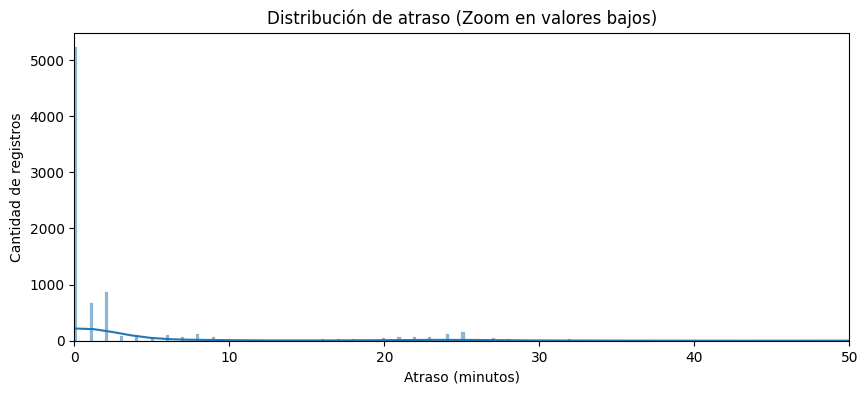

In [11]:
plt.figure(figsize=[10, 4])
sns.histplot(x=df['atraso'], kde=True)
# **Añadir un límite al eje X**
plt.xlim(0, 50)
plt.ylabel('Cantidad de registros') # Cambié la etiqueta, ver punto 3
plt.xlabel('Atraso (minutos)') # Cambié la etiqueta, ver punto 3
plt.title('Distribución de atraso (Zoom en valores bajos)')
plt.show()

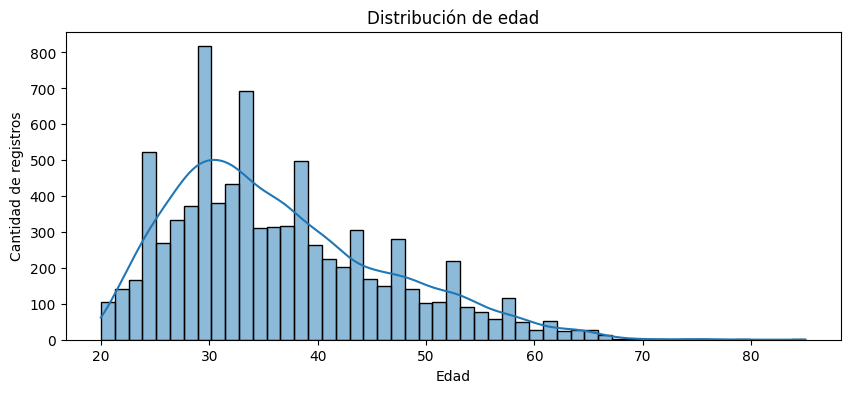

In [12]:
plt.figure(figsize=[10,4])
sns.histplot(x=df['edad'], kde=True)
plt.ylabel('Cantidad de registros')
plt.xlabel('Edad')
plt.title('Distribución de edad')
plt.show()


“La distribución de edad presenta un sesgo positivo, con una fuerte concentración entre los 25 y 30 años y una cola que se extiende hasta alrededor de 70, reflejando una población mayoritariamente joven con pocos casos de edades elevadas.”

Text(0.5, 1.0, 'Distribución de días laborados')

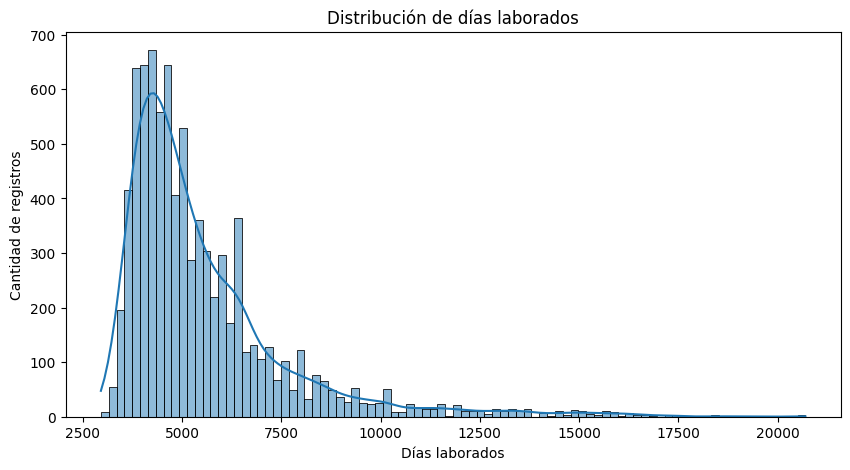

In [13]:
plt.figure(figsize=[10,5])
sns.histplot(x=df['dias_lab'], kde=True)
plt.ylabel('Cantidad de registros')
plt.xlabel('Días laborados')
plt.title('Distribución de días laborados')

La distribución de la variable dias_lab (días laborados) presenta una asimetría positiva o sesgo hacia la derecha, lo que significa que la mayor parte de los valores se concentran en el rango bajo–medio, mientras que solo unos pocos valores se extienden hacia cifras más altas.

El KDE y el histograma muestran un pico principal entre aproximadamente 3000 y 4000 días, indicando que la mayor parte de las personas tiene entre 8 y 11 años de experiencia laboral acumulada.

La densidad disminuye progresivamente a medida que aumentan los días trabajados.

La cola derecha se extiende más allá de los 10000 días, lo que representa casos poco frecuentes de personas con trayectorias laborales muy largas (más de 27 años).

Esta asimetría positiva sugiere que existen algunos valores altos atípicos, pero no llegan a dominar la distribución.

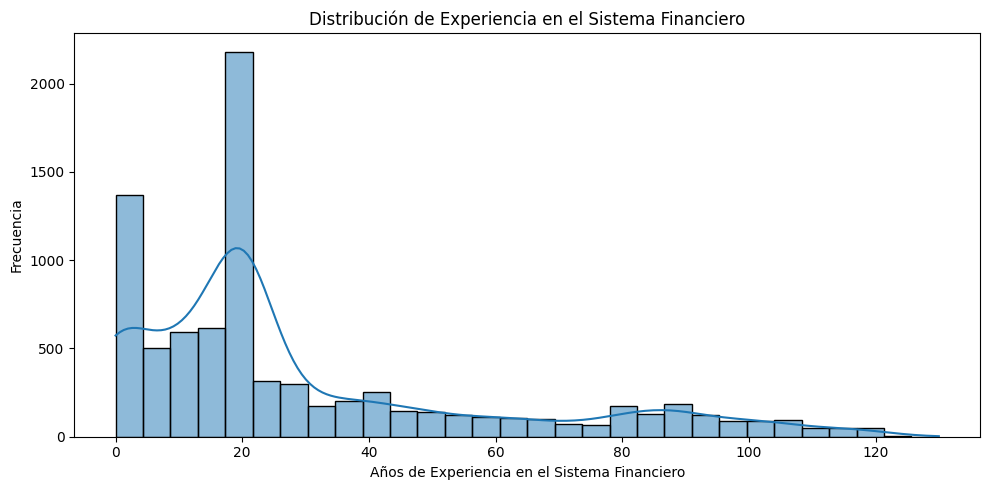

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='exp_sf', kde=True, bins=30)
plt.xlabel('Años de Experiencia en el Sistema Financiero')
plt.ylabel('Frecuencia')
plt.title('Distribución de Experiencia en el Sistema Financiero')
plt.tight_layout()
plt.show()


La variable exp_sf presenta una fuerte asimetría positiva, con la mayor concentración de valores entre 0 y 30 años y un pico alrededor de los 20 años. Se observan valores atípicos mayores a 100 años, que probablemente corresponden a errores. La distribución refleja que la mayoría de los individuos tienen poca experiencia en el sistema financiero.”

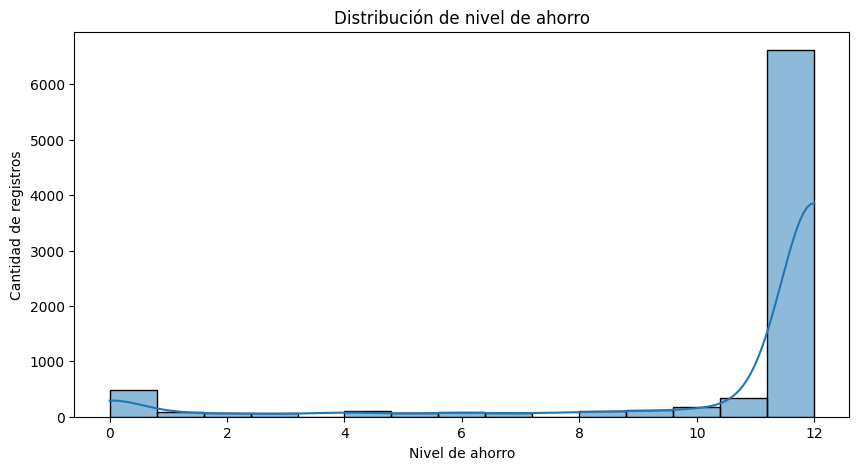

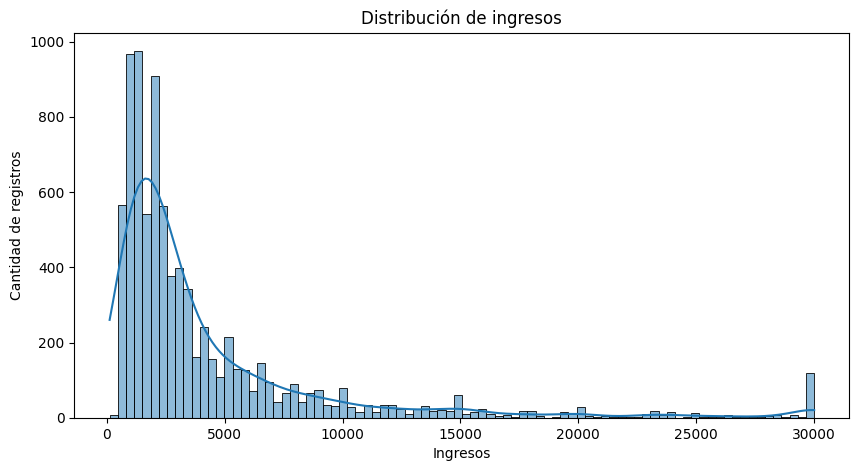

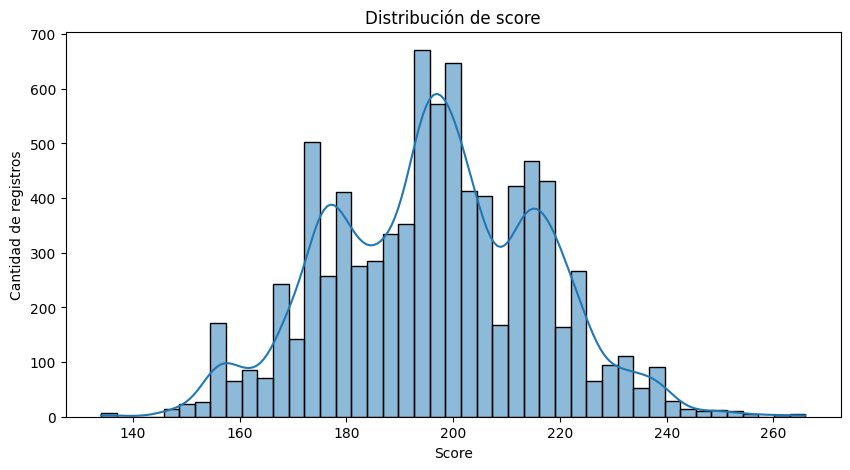

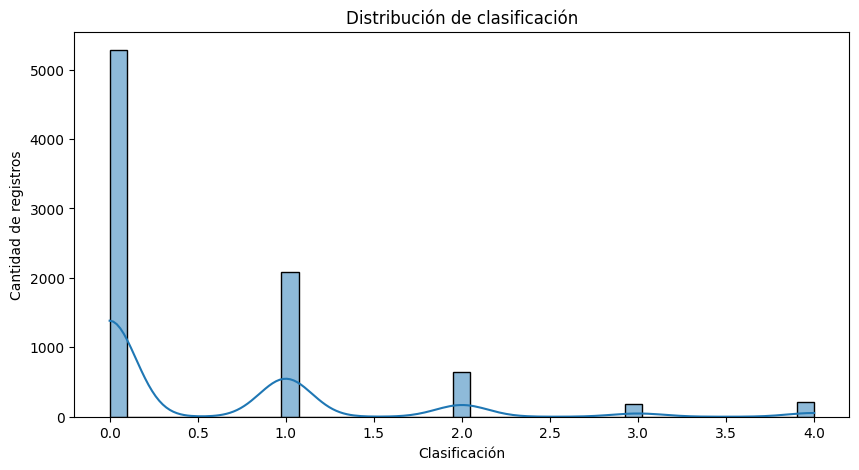

In [15]:
plt.figure(figsize=[10,5])
sns.histplot(x=df['nivel_ahorro'], kde=True)
plt.ylabel('Cantidad de registros')
plt.xlabel('Nivel de ahorro')
plt.title('Distribución de nivel de ahorro')
plt.show()

plt.figure(figsize=[10,5])
sns.histplot(x=df['ingreso'], kde=True)
plt.ylabel('Cantidad de registros')
plt.xlabel('Ingresos')
plt.title('Distribución de ingresos')
plt.show()

plt.figure(figsize=[10,5])
sns.histplot(x=df['score'], kde=True)
plt.ylabel('Cantidad de registros')
plt.xlabel('Score')
plt.title('Distribución de score')
plt.show()

plt.figure(figsize=[10,5])
sns.histplot(x=df['clasif_sbs'], kde=True)
plt.ylabel('Cantidad de registros')
plt.xlabel('Clasificación')
plt.title('Distribución de clasificación')
plt.show()

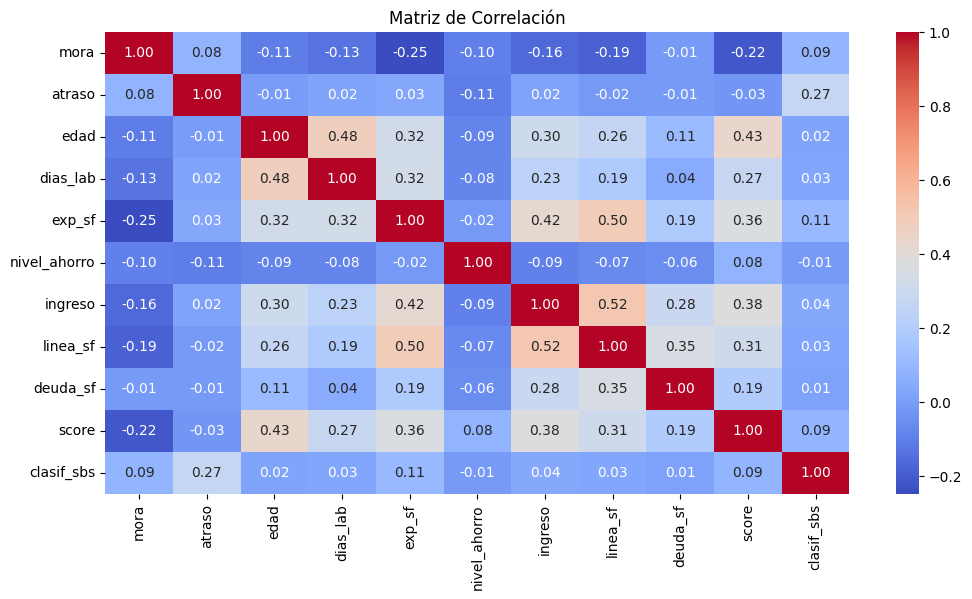

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

No existen correlaciones extremadamente fuertes (cerca de 1) que indiquen multicolinealidad severa, salvo entre Ingreso y Línea_sf, algo completamente normal.

La mayoría de las correlaciones son medias o bajas, permitiendo un análisis individual de variables sin problemas de solapamiento.

Podemos usar estas relaciones para:

Detectar variables relevantes para modelos predictivos (score, ingreso, línea_sf, deuda_sf).

Identificar factores que pueden influir más en el riesgo del cliente.

Entender estructuras de comportamiento financiero del dataset.

**Análisis bivariado (relaciones entre variables numéricas y categóricas)**

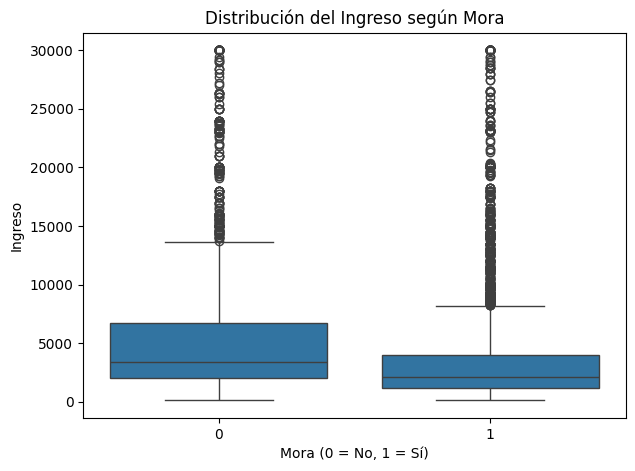

In [34]:
# plt.figure(figsize=(10, 5))
# sns.scatterplot(data=df, x='ingreso', y='mora')
# plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="mora", y="ingreso")
plt.xlabel("Mora (0 = No, 1 = Sí)")
plt.ylabel("Ingreso")
plt.title("Distribución del Ingreso según Mora")
plt.show()



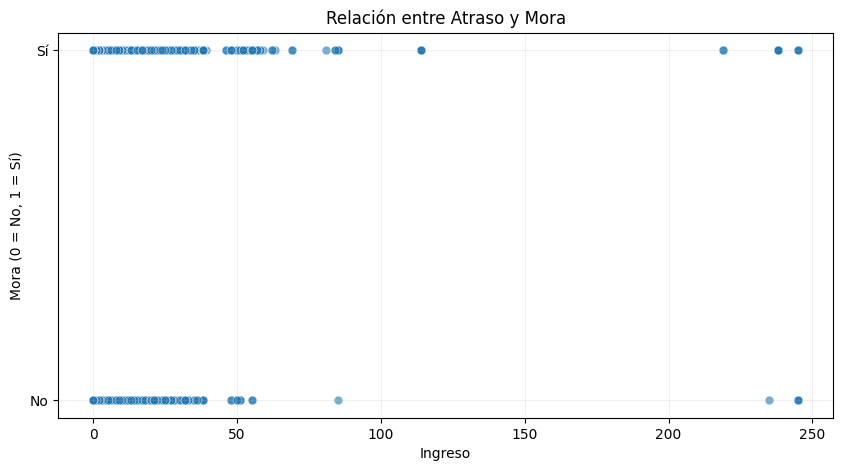

In [33]:
plt.figure(figsize=(10, 5))

sns.scatterplot(
    data=df,
    x='atraso',
    y='mora',
    alpha=0.6,      # transparencia para ver mejor la densidad
    s=40            # tamaño de los puntos
)

plt.title("Relación entre Atraso y Mora")
plt.xlabel("Ingreso")
plt.ylabel("Mora (0 = No, 1 = Sí)")
plt.yticks([0, 1], ["No", "Sí"])   # etiquetas más claras
plt.grid(alpha=0.2)

plt.show()


<Axes: xlabel='mora', ylabel='edad'>

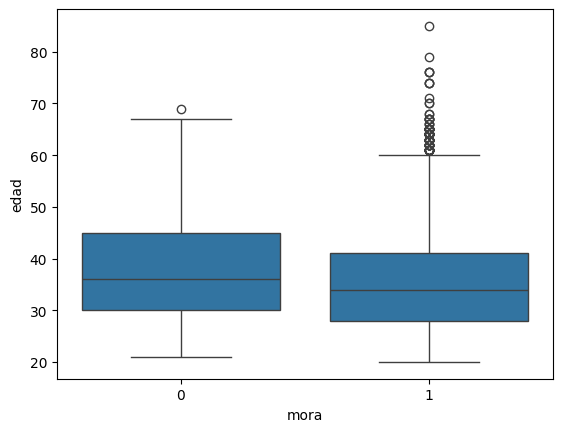

In [22]:
sns.boxplot(x=df['mora'], y=df['edad'])

<Axes: xlabel='mora', ylabel='dias_lab'>

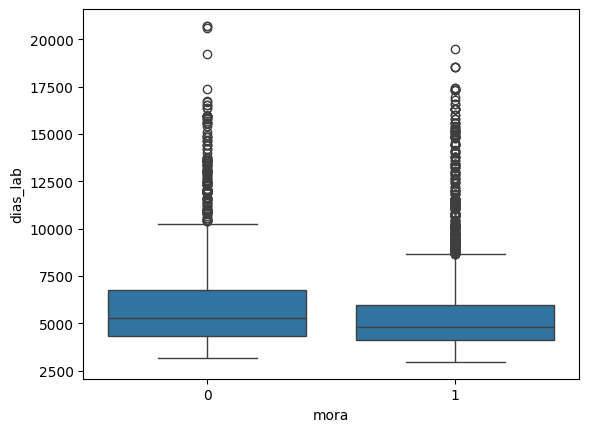

In [23]:
sns.boxplot(x=df['mora'], y=df['dias_lab'])

<Axes: xlabel='mora', ylabel='exp_sf'>

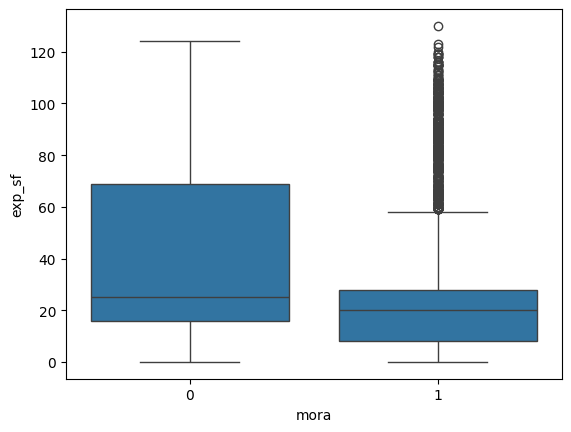

In [24]:
sns.boxplot(x=df['mora'], y=df['exp_sf'])

<Axes: xlabel='mora', ylabel='nivel_ahorro'>

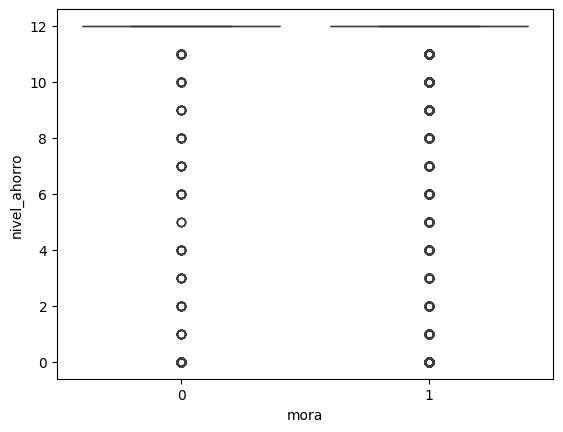

In [25]:
sns.boxplot(x=df['mora'], y=df['nivel_ahorro'])

<Axes: xlabel='mora', ylabel='linea_sf'>

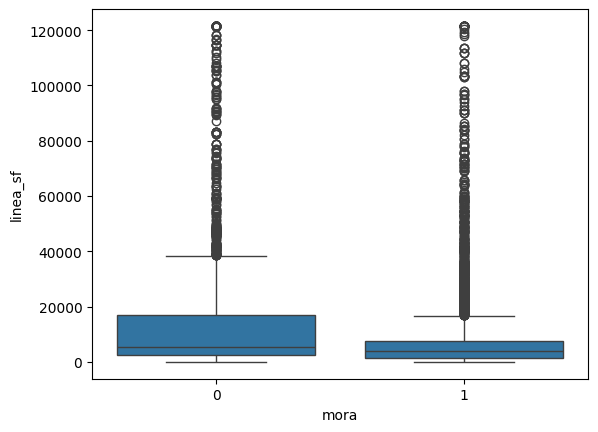

In [26]:
sns.boxplot(x=df['mora'], y=df['linea_sf'])

<Axes: xlabel='mora', ylabel='deuda_sf'>

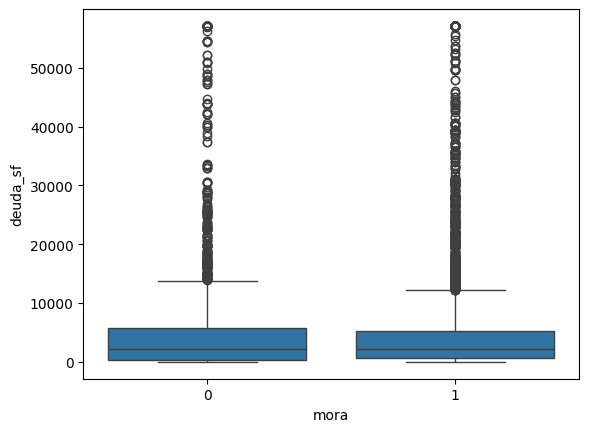

In [27]:
sns.boxplot(x=df['mora'], y=df['deuda_sf'])

<Axes: xlabel='mora', ylabel='score'>

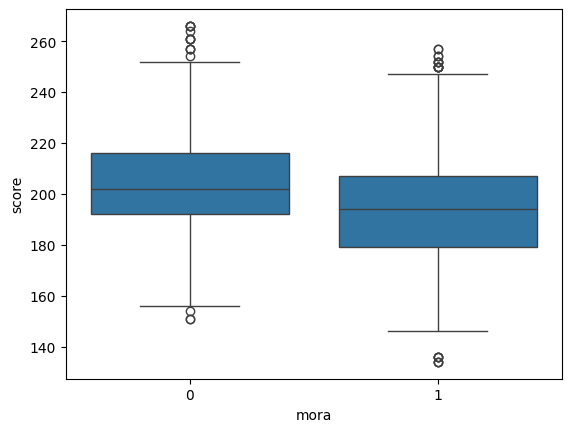

In [29]:
sns.boxplot(x=df['mora'], y=df['score'])

<Axes: xlabel='mora', ylabel='clasif_sbs'>

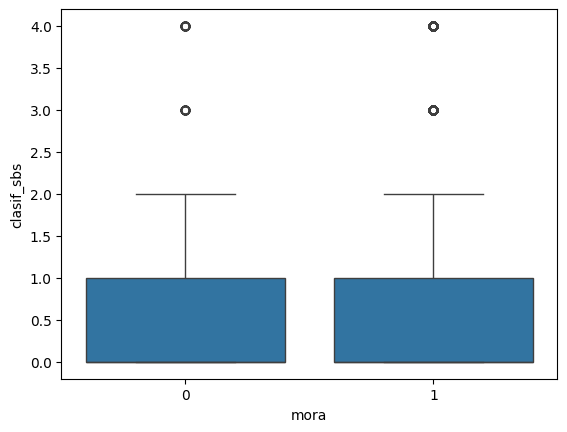

In [30]:
sns.boxplot(x=df['mora'], y=df['clasif_sbs'])

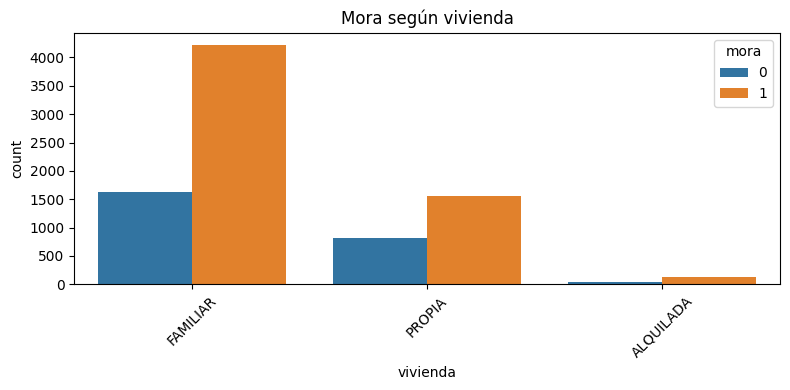

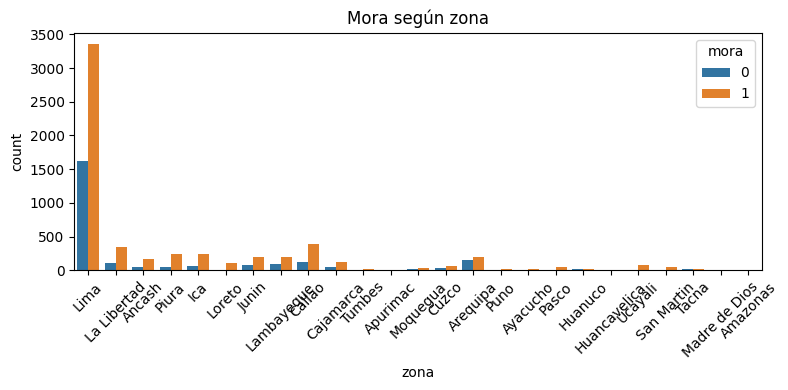

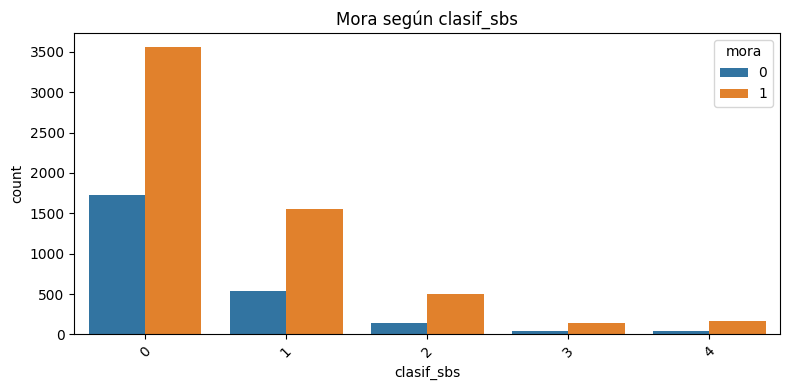

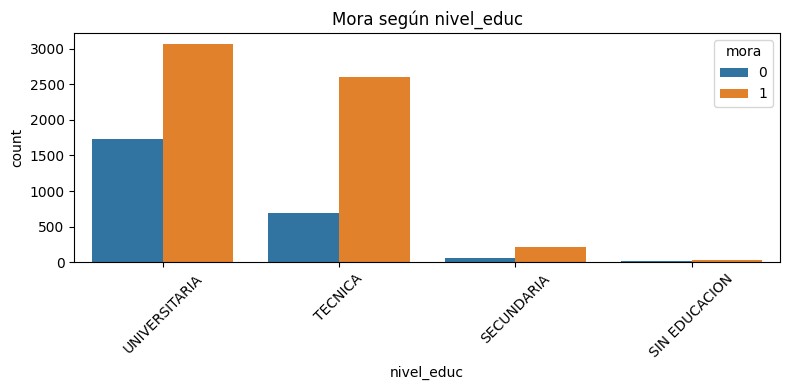

In [36]:
cat_vars = ["vivienda", "zona", "clasif_sbs", "nivel_educ"]

for col in cat_vars:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue="mora")
    plt.title(f"Mora según {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


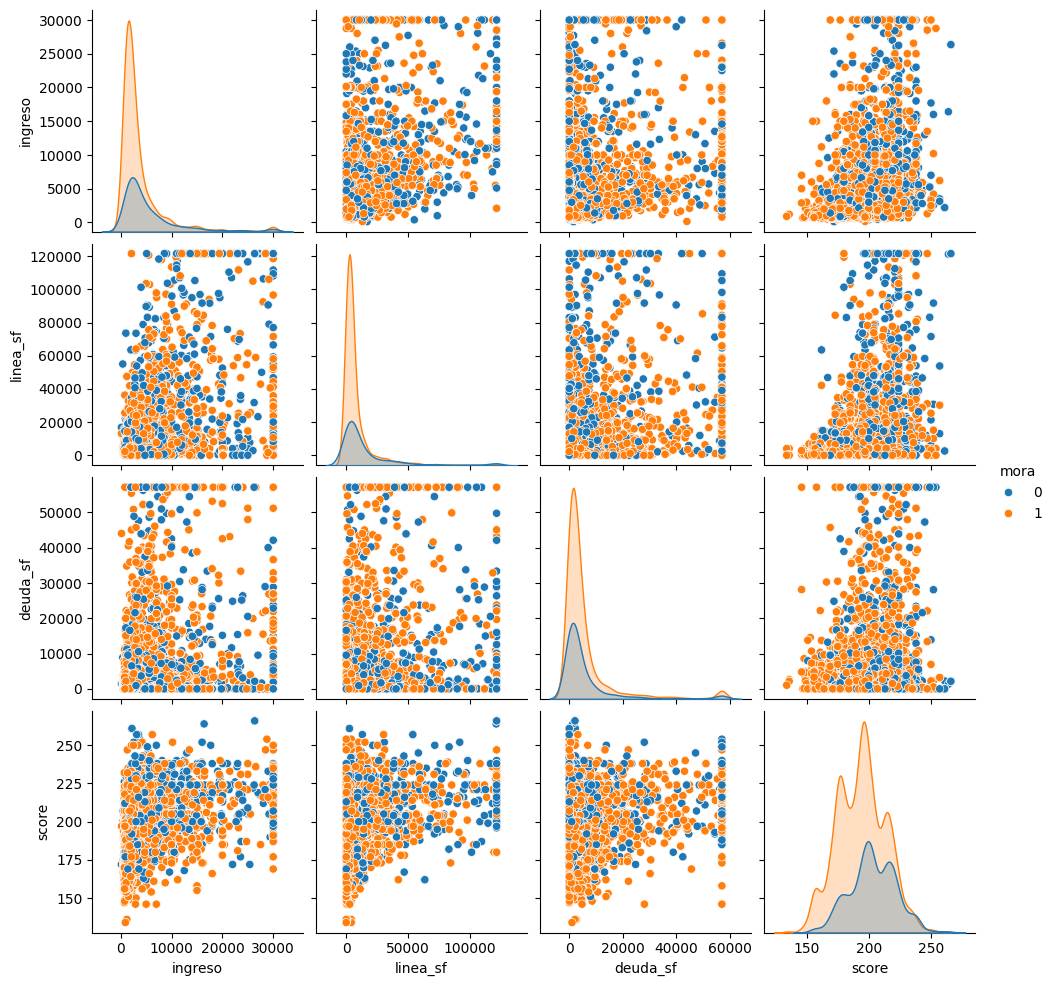

In [37]:
sns.pairplot(df[["ingreso","linea_sf","deuda_sf","score","mora"]], hue="mora")
plt.show()
